# Melanoma Detection Assignment

In this assignment, you will build a multiclass classification model using a custom convolutional neural network in TensorFlow.


**Problem statement:** To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Import Skin Cancer Data

#### Import all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [ ]:
# As this assignment is done on google colab, adding google drive for image data placed on google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


There is a dataset of about 2357 images of different skin cancer types. These images are of 9 different types of cancers separated in 9 folders.

In [ ]:
!unzip -q /content/gdrive/My\ Drive/CNN_Assignment/CNN_assignment

In [ ]:
!ls

# Observation:
# Listed the parent directories of the image data.

 gdrive   sample_data  'Skin cancer ISIC The International Skin Imaging Collaboration'


In [ ]:
# Train and Test folders.
!ls "Skin cancer ISIC The International Skin Imaging Collaboration"

Test  Train


In [ ]:
# Paths for train and test data images
dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
# Count of images in each directory
image_count_train = len(list(dir_train.glob('*/*.jpg')))
print("Train images:\t", image_count_train)
image_count_test = len(list(dir_test.glob('*/*.jpg')))
print("Test images:\t", image_count_test)

# Observations:
# Train images: 2239
# Test images: 118

Train images:	 2239
Test images:	 118


### Load using keras.preprocessing

Let's load these images off disk.

### Create a dataset

Define batch size and image height and width parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Create train and validation dataset from the train dataset.
Using 80% of the images for training, and 20% for validation.

In [ ]:
## Using seed=123 while creating the traingin subset of dataset
## Also resizing the images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Observations:
# For training as per 80%, 1792 images subset is created.

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Using seed=123 while creating the validation subset of dataset using tf.keras.preprocessing.image_dataset_from_directory
## Also resizing the images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Observations:
# For training as per 80%, 447 images subset is created.

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# Class names correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

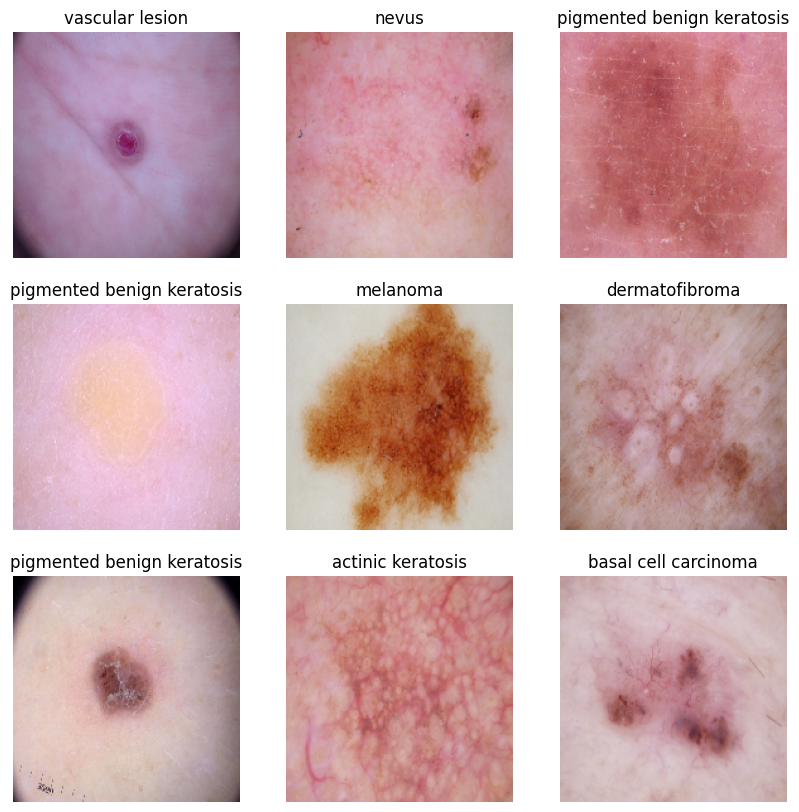

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Observations:
# Taken one instance of all the nine classes in the dataset.

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Observations:
# Caching the images in memory after loading from the disk for the first epoch
# and overlaping data preprocessing and model execution during training.

### Create the model

In [ ]:
num_classes = 9

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# Observations:
# Model created for 9 classes and pixels normalized to have value between 0 and 1 by rescaling.

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Summary of all layers

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 26s 67ms/step - loss: 2.0582 - accuracy: 0.2154 - val_loss: 1.9606 - val_accuracy: 0.2573
Epoch 2/20
56/56 [==============================] - 1s 21ms/step - loss: 1.8461 - accuracy: 0.3198 - val_loss: 1.7660 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 1s 20ms/step - loss: 1.7378 - accuracy: 0.3677 - val_loss: 1.6722 - val_accuracy: 0.4116
Epoch 4/20
56/56 [==============================] - 1s 22ms/step - loss: 1.5580 - accuracy: 0.4464 - val_loss: 1.6712 - val_accuracy: 0.3893
Epoch 5/20
56/56 [==============================] - 1s 25ms/step - loss: 1.4397 - accuracy: 0.4782 - val_loss: 1.4412 - val_accuracy: 0.4922
Epoch 6/20
56/56 [==============================] - 1s 26ms/step - loss: 1.3020 - accuracy: 0.5396 - val_loss: 1.4363 - val_accuracy: 0.5213
Epoch 7/20
56/56 [==============================] - 1s 22ms/step - loss: 1.2304 - accuracy: 0.5614 - val_loss: 1.3972 - val_accuracy: 0.5347
Epoch 8/20
5

### Visualizing training results

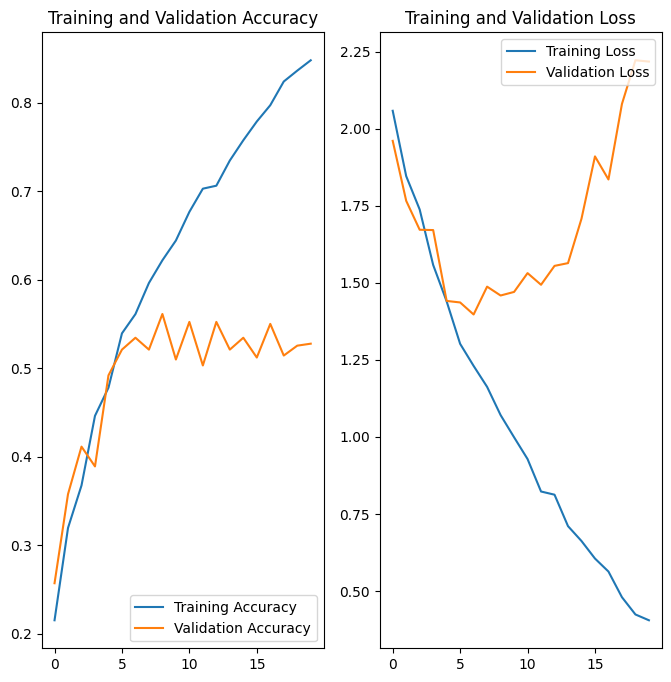

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations:

In the plots above, the training accuracy is increasing linearly over time upto 85%, but validation accuracy ramained around 55%.
We can say the it is **overfitting** during the training and failed to cover the validation data/patterns.
It seems there are less image data to identify the patterns appropriately. We need look for augmentation strategies.

#### Augmenting the Image Data

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

#### Visualize the augmented image data

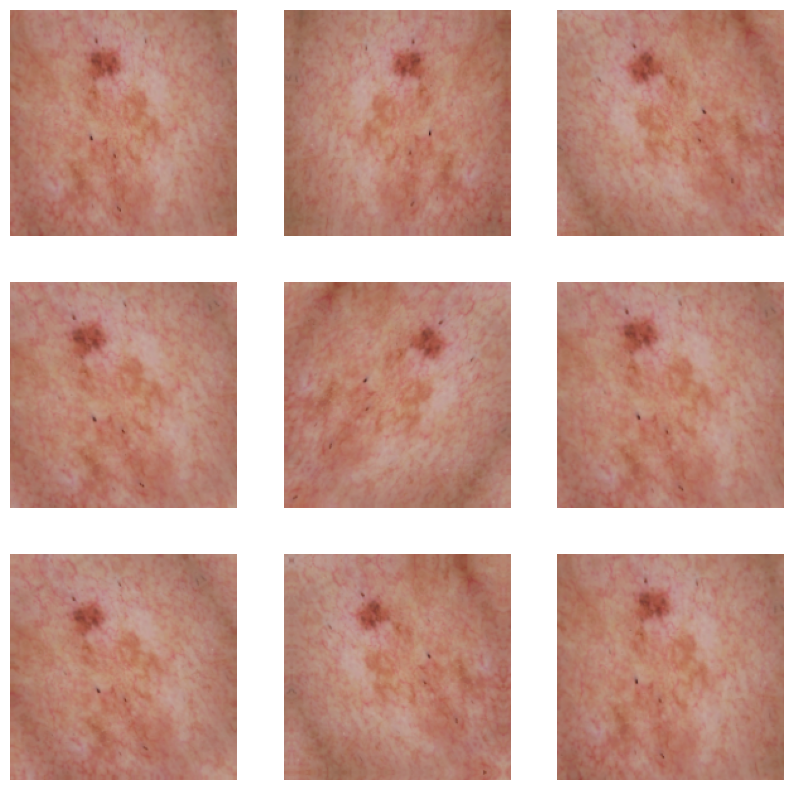

In [ ]:
# Visualize the augmetned images for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Create the model again.

In [ ]:
# As we saw the overfitting, we are using dropout in our model.

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])



#### Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

In [ ]:
# Let's train your model for 30 epochs, and overserve the results at 20 epoch and 30 epochs.
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
56/56 [==============================] - 4s 32ms/step - loss: 1.8621 - accuracy: 0.3052 - val_loss: 1.6833 - val_accuracy: 0.3870
Epoch 2/30
56/56 [==============================] - 2s 28ms/step - loss: 1.6192 - accuracy: 0.4180 - val_loss: 1.5674 - val_accuracy: 0.4385
Epoch 3/30
56/56 [==============================] - 2s 30ms/step - loss: 1.5336 - accuracy: 0.4369 - val_loss: 1.5224 - val_accuracy: 0.4452
Epoch 4/30
56/56 [==============================] - 2s 29ms/step - loss: 1.4847 - accuracy: 0.4676 - val_loss: 1.4976 - val_accuracy: 0.4877
Epoch 5/30
56/56 [==============================] - 2s 29ms/step - loss: 1.4776 - accuracy: 0.4721 - val_loss: 1.4722 - val_accuracy: 0.5034
Epoch 6/30
56/56 [==============================] - 2s 28ms/step - loss: 1.4287 - accuracy: 0.4967 - val_loss: 1.4162 - val_accuracy: 0.4989
Epoch 7/30
56/56 [==============================] - 2s 28ms/step - loss: 1.4063 - accuracy: 0.5140 - val_loss: 1.4228 - val_accuracy: 0.4944
Epoch 8/30
56

### Visualizing the results

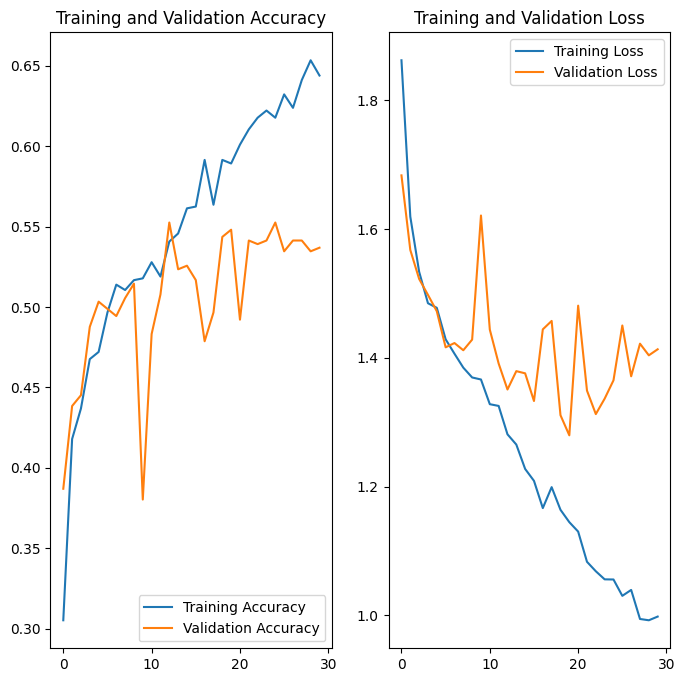

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:
Overall accuracy is very low, so it is **underfitting** the results.
Upto 20 epochs:
Now Accuracy is 58% and validation acc. is 54%

After 30 epochs:
Accuracy goes upto 65%, while validation accuracy goes other way down to 53%

There may be an imbalance between classes regarding the datasets. Some class may have more samples compared to others. So let's check the districution of classes in data.

#### Check For Class Imbalance By Distribution of Classes In Training Dataset



In [ ]:
from glob import glob
path_list = [x for x in glob(os.path.join(dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(dir_train, '*', '*.jpg'))]
len(path_list)

2239

In [ ]:
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
1,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
2,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
3,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
4,Skin cancer ISIC The International Skin Imagin...,pigmented benign keratosis
...,...,...
2234,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2235,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2236,Skin cancer ISIC The International Skin Imagin...,vascular lesion
2237,Skin cancer ISIC The International Skin Imagin...,vascular lesion


Class=5, n=462 (20.634%)
Class=0, n=114 (5.092%)
Class=4, n=357 (15.945%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=6, n=77 (3.439%)
Class=1, n=376 (16.793%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


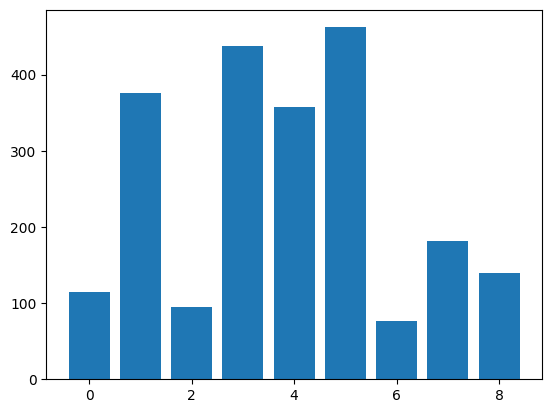

In [ ]:
from sklearn.preprocessing import LabelEncoder
from collections import Counter
# split into input and output elements
X, y = original_df['Path'], original_df['Label']
# label encode the target variable
y = LabelEncoder().fit_transform(y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Observations:
#### - "Seborrheic keratosis" has the least number of samples, which is only 77 samples.
#### - "Pigmented benign keratosis" and "melanoma" dominate the data in terms proportionate number of samples, 462 and 438 samples respectively.


### Use "Augmentor", A Python Package To Take Care Of Class Imbalance.

#### Installing Augmentor

In [ ]:
!pip install Augmentor

In [ ]:
# Adding 500 samples per class to make sure that none of the classes are sparse.
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D068E7AF5B0>: 100%|██████████| 500/500 [00:22<00:00, 22.25 Samples/s]


Initialised with 376 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0710DDB880>: 100%|██████████| 500/500 [00:19<00:00, 25.40 Samples/s]


Initialised with 95 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D073ADFC2E0>: 100%|██████████| 500/500 [00:19<00:00, 25.38 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7D068E7970D0>: 100%|██████████| 500/500 [01:34<00:00,  5.27 Samples/s]


Initialised with 357 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x7D068E7E3070>: 100%|██████████| 500/500 [01:16<00:00,  6.50 Samples/s]


Initialised with 462 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D0692134B80>: 100%|██████████| 500/500 [00:16<00:00, 30.51 Samples/s]


Initialised with 77 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D068E796AD0>: 100%|██████████| 500/500 [00:38<00:00, 12.99 Samples/s]


Initialised with 181 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D068E7ACC70>: 100%|██████████| 500/500 [00:15<00:00, 31.38 Samples/s]


Initialised with 139 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D068E7E37F0>: 100%|██████████| 500/500 [00:16<00:00, 31.06 Samples/s]


#### Observations:
Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


#### Distribution of augmented data after adding new images to the original training data.

In [ ]:
path_list_new = [x for x in glob(os.path.join(dir_train, '*','output', '*.jpg'))]
path_list_new

['Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0025743.jpg_f77a9b6d-fb99-4706-a1e8-884cdd413e91.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026803.jpg_a319e6a5-8930-4c30-a32f-439c6b68df77.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0026849.jpg_fb77f764-0908-456b-a96c-b4ee98033a0f.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0027954.jpg_4cb4b9d9-470d-42ab-963b-29c13f92c3a8.jpg',
 'Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output/pigmented benign keratosis_original_ISIC_0028646.jpg_ae71007c-eba1-4172-8c77-dd4a17114fe1.jpg',


In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(dir_train, '*','output', '*.jpg'))]
lesion_list_new

['pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmented benign keratosis',
 'pigmen

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

<ipython-input-37-17a6b079869a>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### Create a training dataset

In [ ]:
# Creating Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### Create a validation dataset

In [ ]:
# Creating Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### Create your model including normalization

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### Compile the model with appropriate optimizer and loss function.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Train the model

In [ ]:
# Training the model with 30 epochs
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 11s 65ms/step - loss: 1.9121 - accuracy: 0.2761 - val_loss: 1.5675 - val_accuracy: 0.3890
Epoch 2/30
169/169 [==============================] - 5s 27ms/step - loss: 1.4979 - accuracy: 0.4345 - val_loss: 1.2994 - val_accuracy: 0.5160
Epoch 3/30
169/169 [==============================] - 5s 30ms/step - loss: 1.2273 - accuracy: 0.5467 - val_loss: 1.2018 - val_accuracy: 0.5412
Epoch 4/30
169/169 [==============================] - 5s 28ms/step - loss: 1.0649 - accuracy: 0.6085 - val_loss: 1.0774 - val_accuracy: 0.6154
Epoch 5/30
169/169 [==============================] - 5s 27ms/step - loss: 0.9075 - accuracy: 0.6747 - val_loss: 1.0001 - val_accuracy: 0.6281
Epoch 6/30
169/169 [==============================] - 5s 28ms/step - loss: 0.7695 - accuracy: 0.7246 - val_loss: 0.9173 - val_accuracy: 0.6600
Epoch 7/30
169/169 [==============================] - 5s 28ms/step - loss: 0.6471 - accuracy: 0.7710 - val_loss: 0.8829 - val_accuracy: 0.694

#### Visualize the model results

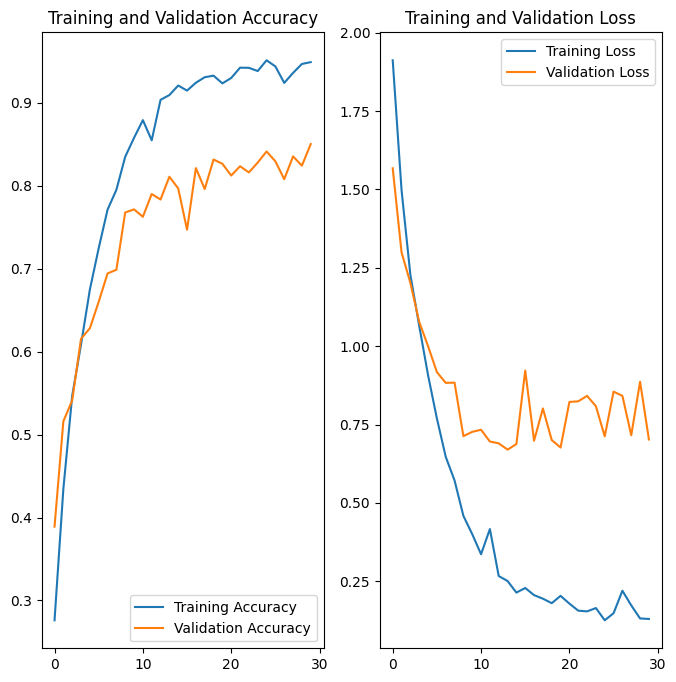

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations:
After taking care of the classes imbalance with Augmentor (500 samples of each class) we can see that,

- Accuracy is linearly increasing to 94.88%.
- Same is with the validation accuracy and it has increased to 85%.

It seems overfitting and underfitting issues we saw in earlier two models are taken care of at a great level.

### Test the model

1/1 [==============================] - 0s 20ms/step
Actual Class: basal cell carcinoma
Predictive Class: squamous cell carcinoma


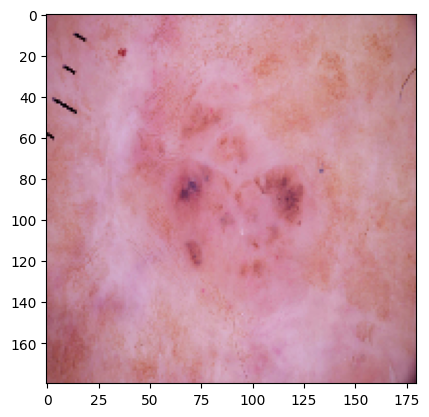

In [ ]:
from glob import glob
from keras.preprocessing.image import load_img, img_to_array
Test_image_path = os.path.join(dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print(f"Actual Class: {class_names[1]}" + '\n' + "Predictive Class: " + pred_class)